In [45]:
import import_ipynb
import preprocess_model
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Reshape


In [77]:
df = pd.read_csv('./data/new_data_asia.csv')

In [78]:
numerical_features = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year']
categorical_features = ['Country']
target = 'Literacy rate'

# Drop rows with missing target values
df.dropna(subset=[target], inplace=True)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Model
from keras.layers import Input, SimpleRNN, Dense, Concatenate
import numpy as np

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  ----------


Epoch 1/200
3/3 [==============================] - 3s 187ms/step - loss: 8901.3320 - val_loss: 9260.7061
Epoch 2/200
3/3 [==============================] - 0s 27ms/step - loss: 8884.9531 - val_loss: 9246.3105
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 8869.6924 - val_loss: 9231.7637
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 8853.3838 - val_loss: 9215.7393
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 8835.5195 - val_loss: 9196.5342
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 8812.8682 - val_loss: 9170.1172
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 8777.0635 - val_loss: 9099.9160
Epoch 8/200
3/3 [==============================] - 0s 22ms/step - loss: 8613.2559 - val_loss: 8420.1660
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 6686.9185 - val_loss: 1008.7183
Epoch 10/200
3/3 [==============================] - 0s 22ms/ste

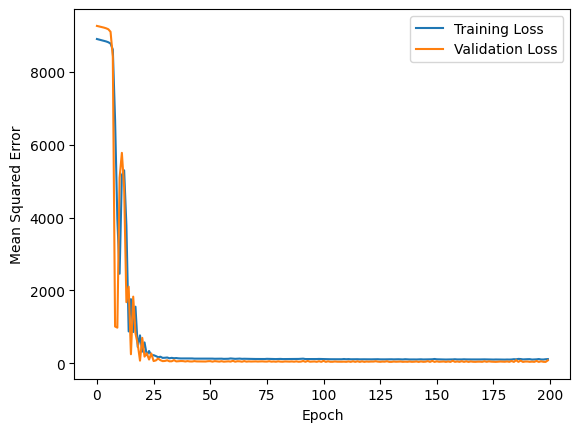

In [111]:
# Label Encoding for categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat_encoded = one_hot_encoder.fit_transform(df[categorical_features])

# Standard Scaling for numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numerical_features])

# Concatenate numerical and categorical features
X = np.concatenate((X_cat_encoded, X_num_scaled), axis=1)
y = df[target]

# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Split numerical and categorical features in train, validation, and test sets
X_cat_train, X_num_train = X_train[:, :len(categorical_features)], X_train[:, len(categorical_features):]
X_cat_val, X_num_val = X_val[:, :len(categorical_features)], X_val[:, len(categorical_features):]
X_cat_test, X_num_test = X_test[:, :len(categorical_features)], X_test[:, len(categorical_features):]


# Reshape the numerical data if necessary
if len(X_num_train.shape) == 2:
    X_num_train = np.expand_dims(X_num_train, axis=2)
    X_num_val = np.expand_dims(X_num_val, axis=2)
    X_num_test = np.expand_dims(X_num_test, axis=2)


# Define model architecture
num_input = Input(shape=(X_num_train.shape[1], X_num_train.shape[2]))
rnn_layer = SimpleRNN(64, activation='relu')(num_input)

cat_input = Input(shape=(X_cat_train.shape[1],))
cat_output = Dense(64, activation='relu')(cat_input)

concatenated = Concatenate()([rnn_layer, cat_output])
output = Dense(1)(concatenated)

model = Model(inputs=[num_input, cat_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_num_train, X_cat_train], y_train, epochs=200, batch_size=64,
                    validation_data=([X_num_val, X_cat_val], y_val), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_num_test, X_cat_test], y_test)

# Make predictions on the test set
predictions = model.predict([X_num_test, X_cat_test])


# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [112]:
print(predictions)


[[96.03441 ]
 [92.85703 ]
 [91.17053 ]
 [93.19644 ]
 [89.41397 ]
 [90.188   ]
 [89.06482 ]
 [89.53475 ]
 [88.99114 ]
 [88.92767 ]
 [89.27248 ]
 [93.265625]
 [93.06053 ]
 [88.96214 ]
 [89.02612 ]
 [93.18046 ]
 [83.51619 ]
 [89.04796 ]
 [89.1024  ]
 [90.46341 ]
 [90.19642 ]
 [93.67797 ]
 [88.86275 ]
 [92.14826 ]
 [89.02075 ]
 [93.08595 ]
 [89.004   ]
 [89.60268 ]
 [89.17584 ]
 [90.17262 ]
 [92.1703  ]
 [90.25885 ]
 [88.92008 ]
 [92.94186 ]
 [93.73378 ]
 [93.79467 ]
 [89.146515]
 [82.40321 ]
 [93.69827 ]
 [90.2341  ]
 [92.63258 ]]
